In [1]:
# !pip install tensorflow -q
# !pip install librosa -q

In [74]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Audio

import os
import sys
import gc

import librosa
import librosa.display
import json
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('file_paths_labels.csv')

In [4]:
df.head()

,Filename,Label
0,cremad/AudioWAV\1001_DFA_ANG_XX.wav,anger
1,cremad/AudioWAV\1001_DFA_DIS_XX.wav,disgust
2,cremad/AudioWAV\1001_DFA_FEA_XX.wav,fear
3,cremad/AudioWAV\1001_DFA_HAP_XX.wav,happiness
4,cremad/AudioWAV\1001_DFA_NEU_XX.wav,neutral


### Sampling rate or Sampling frequency: 
refers to the number of samples of audio taken per second during the analog-to-digital conversion process. It is a fundamental parameter that describes the digital representation of an audio signal and affects the audio quality and file size.
* Our dataset has **four** different sample rates

In [25]:
# Specify the file path of the JSON file
file_path = "data.json"

# Read the JSON file
with open(file_path, "r") as json_file:
    sr_l = json.load(json_file)

In [40]:
sr_l

{'16000': 'cremad/AudioWAV\\1091_WSI_SAD_XX.wav',
 '44100': 'SAVEE/ALL\\KL_n30.wav',
 '24414': 'TESS/TESS Toronto emotional speech set data\\YAF_sad\\YAF_youth_sad.wav',
 '96000': 'TESS/TESS Toronto emotional speech set data\\OAF_Fear\\OAF_food_fear.wav'}

In [48]:
# creating functions to visualize the wave of audio
def create_waveplot(data, sr, emotion):
    plt.figure(figsize=(10, 5))
    plt.title(f'Waveplot for audio with {emotion} emotion having sampling rate {sr}', size=15)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

In [49]:
def create_spectrogram(data, sr, e):
    # stft function converts the data into short term fourier transform
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 5))
    plt.title('STFT Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')   
    #librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar()
    plt.show()

In [51]:
def create_mfcc(data, sr, e):
    # Compute MFCCs
    mfccs = librosa.feature.mfcc(y=data, sr=sr)
    
    # Create a figure for the MFCC plot
    plt.figure(figsize=(12, 5))
    
    # Set the title of the plot
    plt.title('MFCC for audio with {} emotion'.format(e), size=15)
    
    # Display MFCCs
    librosa.display.specshow(mfccs, sr=sr, x_axis='time')
    
    # Add a colorbar to the plot
    plt.colorbar()
    
    # Show the plot
    plt.show()

In [52]:
def create_zcr(data, sr, e):
    # Compute ZCR
    zcr = librosa.feature.zero_crossing_rate(y=data)
    
    # Create a figure for the ZCR plot
    plt.figure(figsize=(12, 5))
    
    # Set the title of the plot
    plt.title('Zero Crossing Rate (ZCR) for audio with {} emotion'.format(e), size=15)
    
    # Plot ZCR
    plt.semilogy(zcr.T, label='ZCR')
    plt.xticks([])
    
    # Add a legend
    plt.legend()
    
    # Show the plot
    plt.show()

In [53]:
def create_mel_spectrogram(data, sr, e):
    # Compute Mel spectrogram
    mel_spectrogram = librosa.feature.melspectrogram(y=data, sr=sr)
    
    # Convert to dB scale
    mel_spectrogram_dB = librosa.power_to_db(mel_spectrogram, ref=np.max)
    
    # Create a figure for the Mel spectrogram plot
    plt.figure(figsize=(12, 5))
    
    # Set the title of the plot
    plt.title('Mel Spectrogram for audio with {} emotion'.format(e), size=15)
    
    # Display Mel spectrogram
    librosa.display.specshow(mel_spectrogram_dB, sr=sr, x_axis='time', y_axis='mel')
    
    # Add a colorbar to the plot
    plt.colorbar()
    
    # Show the plot
    plt.show()

cremad/AudioWAV\1091_WSI_SAD_XX.wav


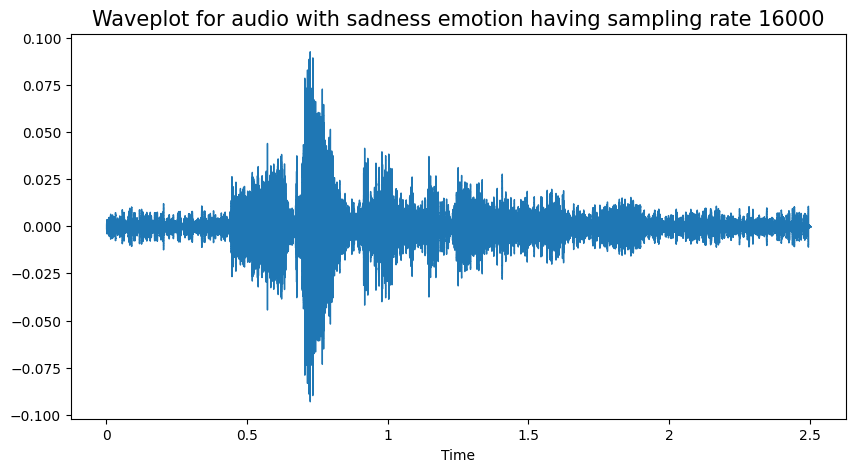

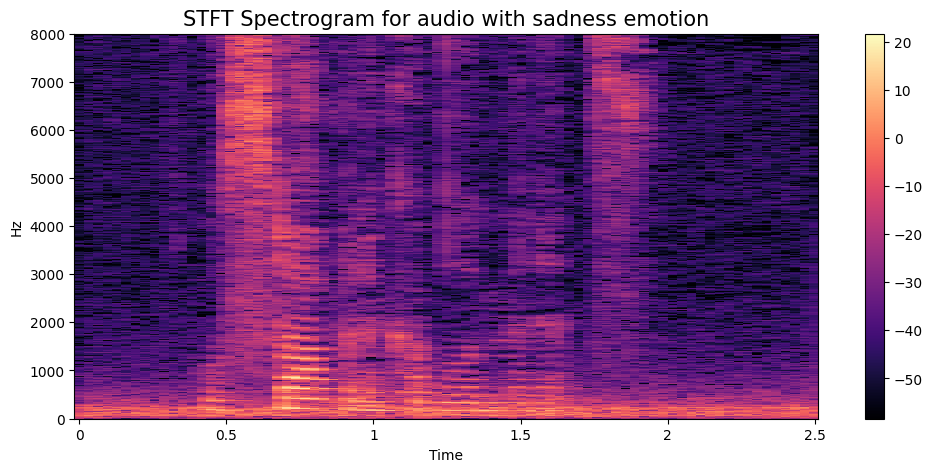

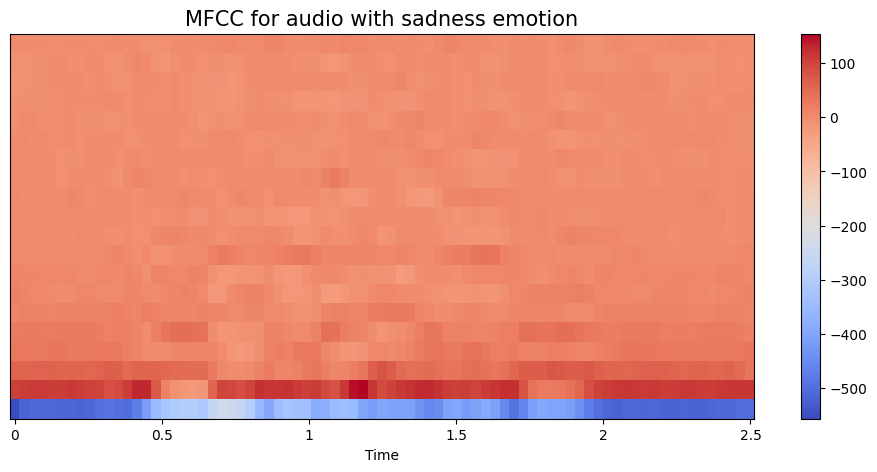

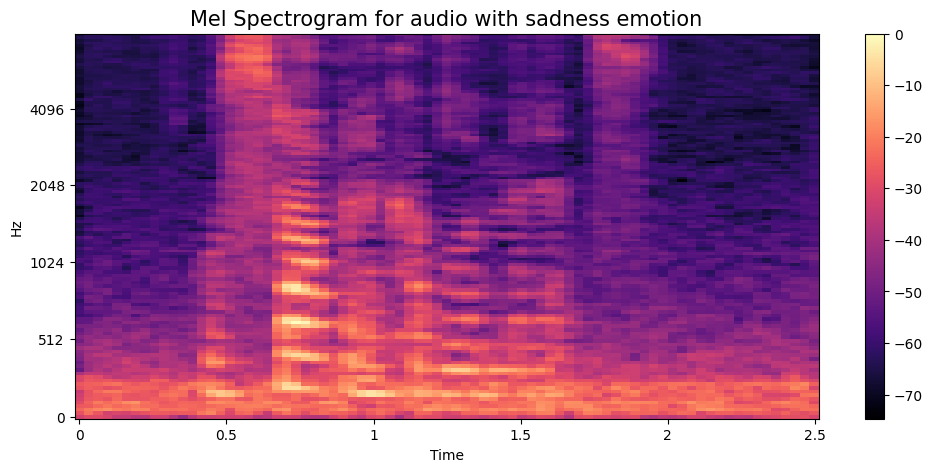

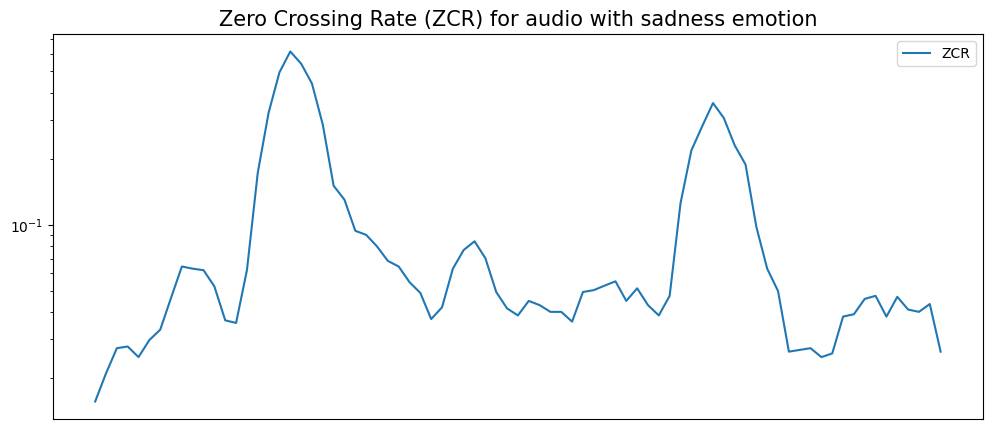

*****************************************************
SAVEE/ALL\KL_n30.wav


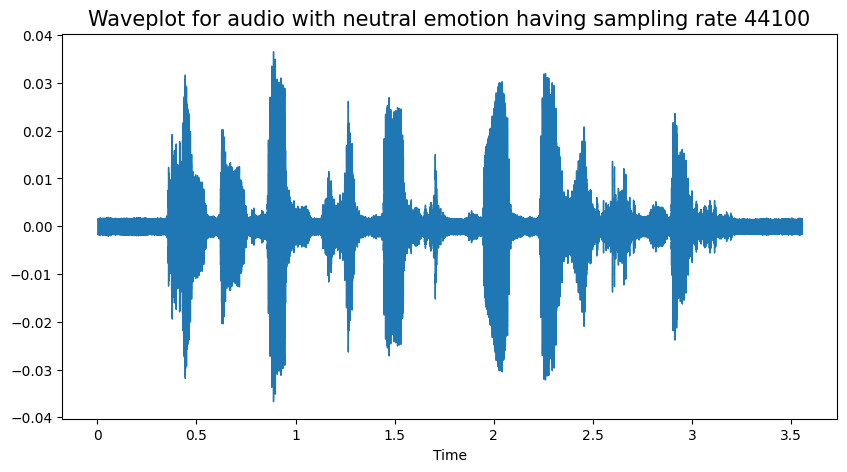

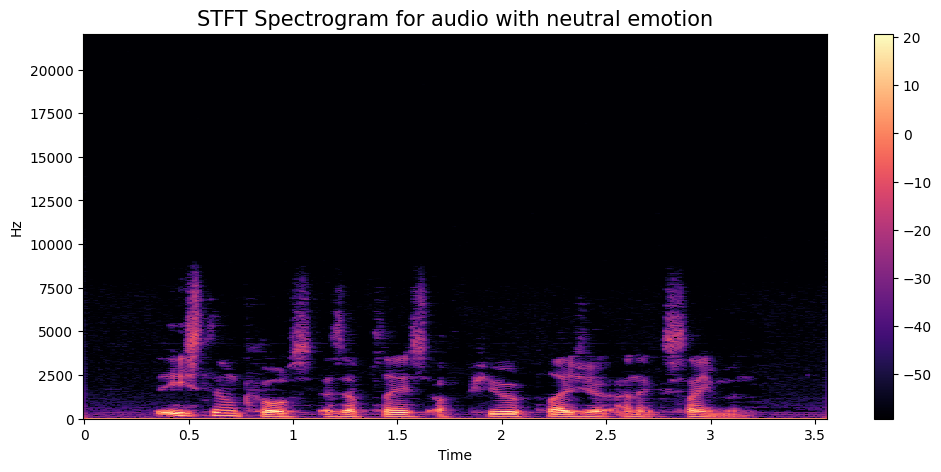

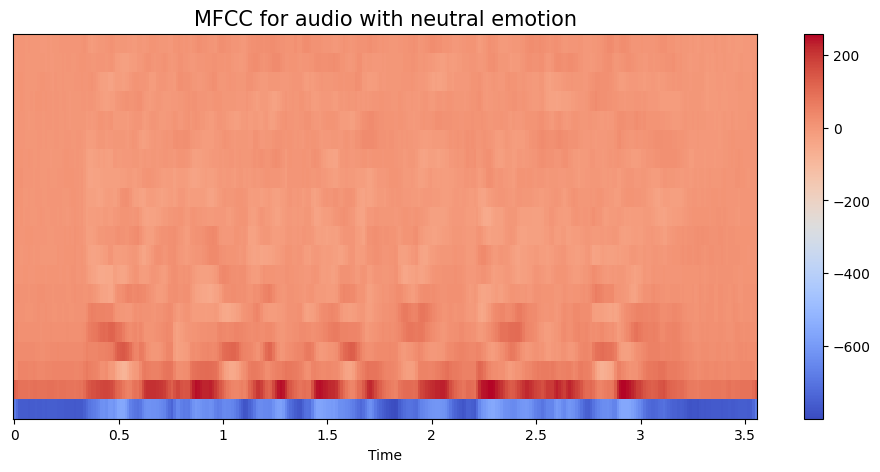

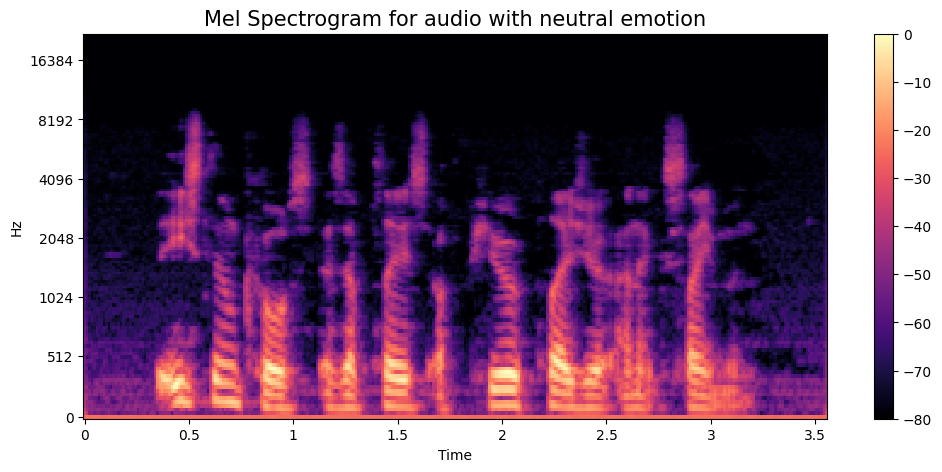

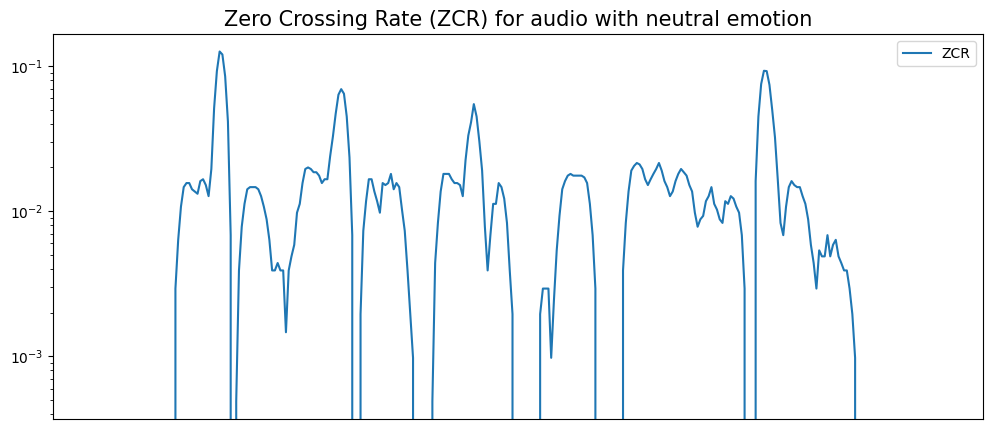

*****************************************************
TESS/TESS Toronto emotional speech set data\YAF_sad\YAF_youth_sad.wav


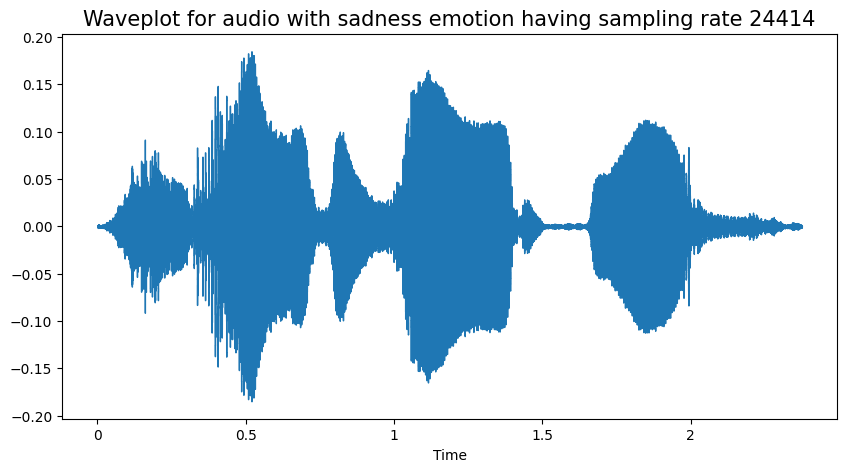

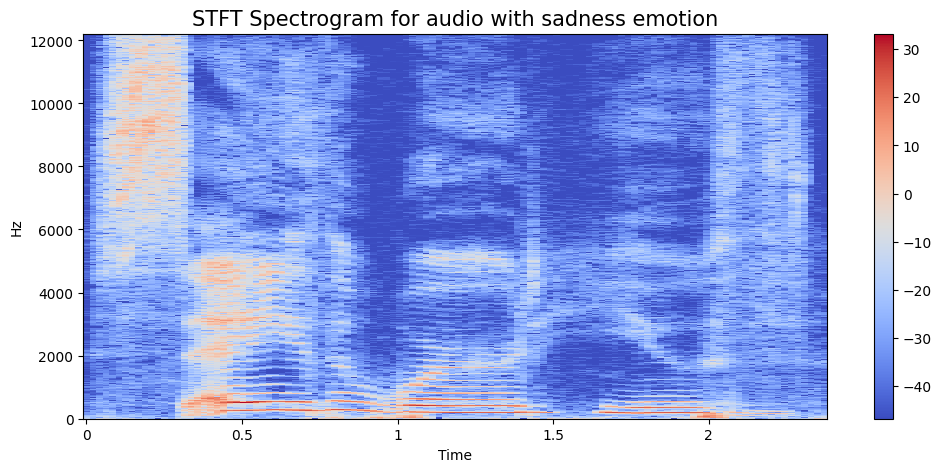

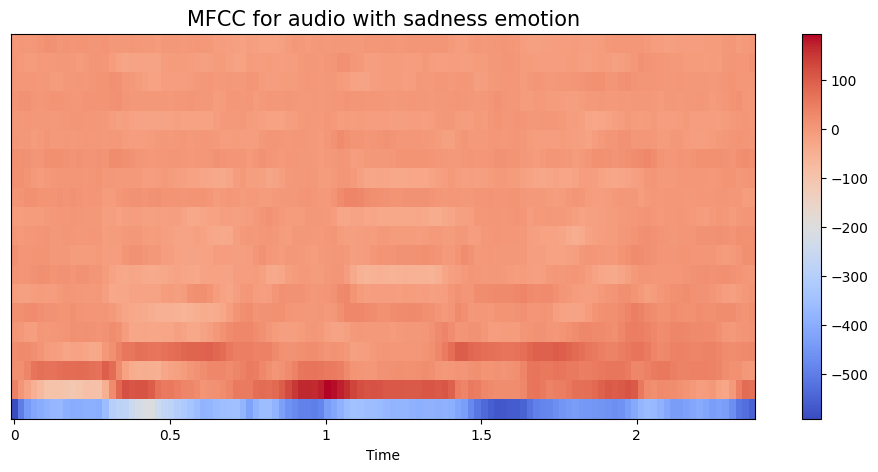

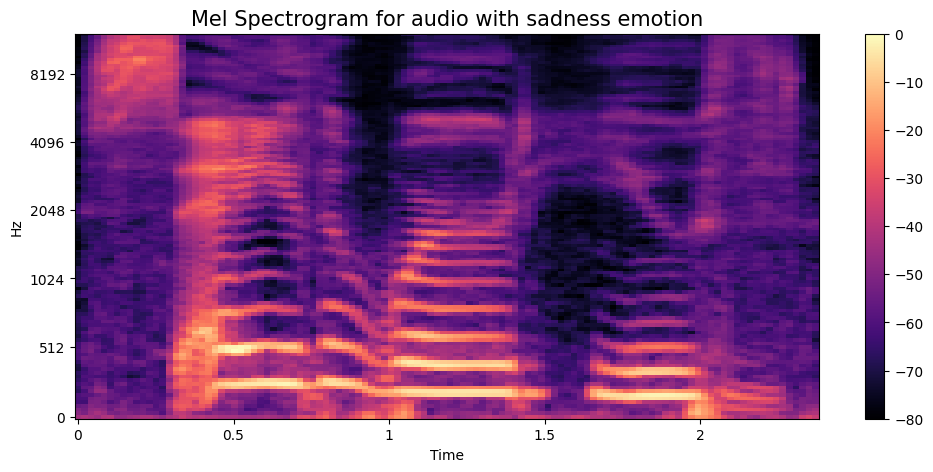

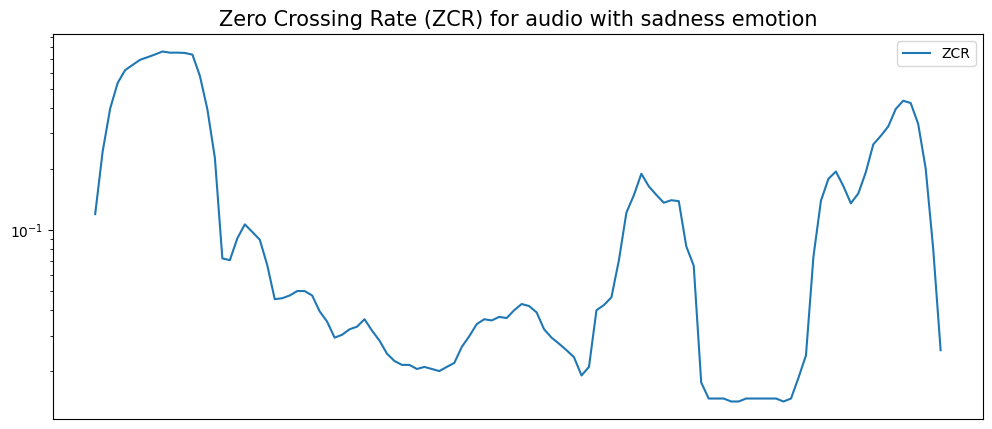

*****************************************************
TESS/TESS Toronto emotional speech set data\OAF_Fear\OAF_food_fear.wav


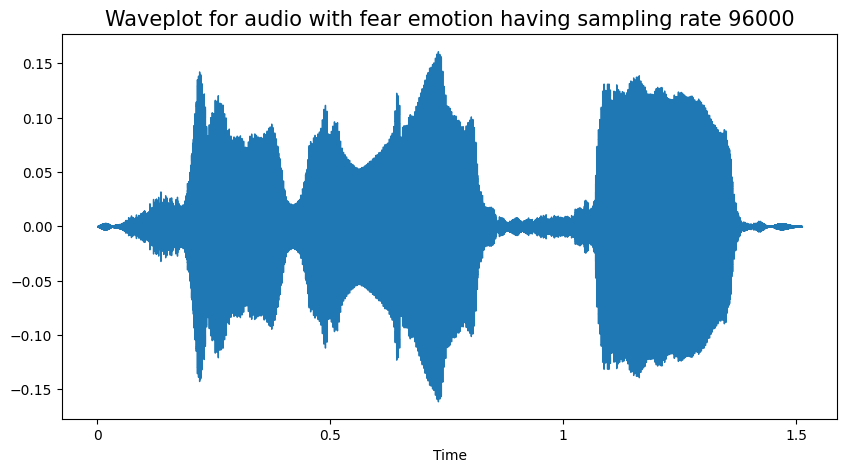

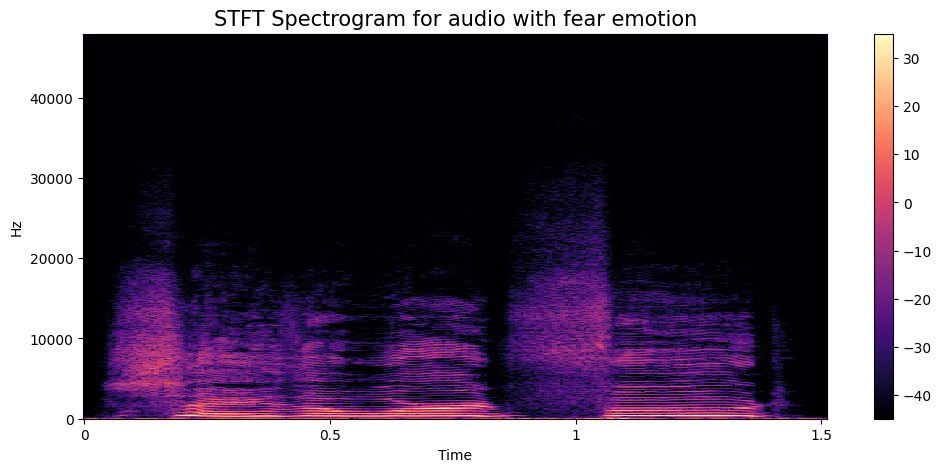

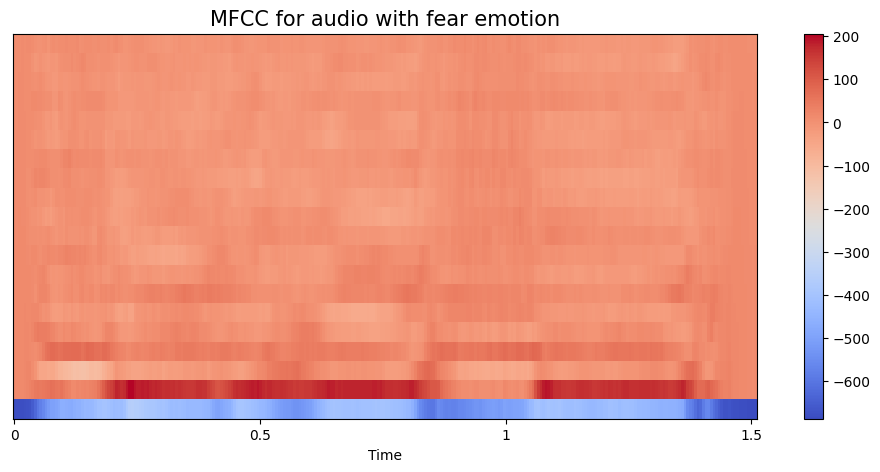

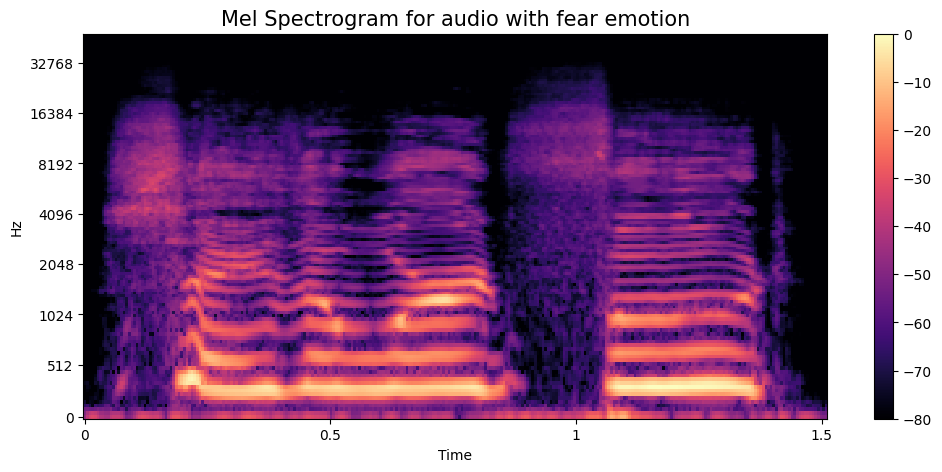

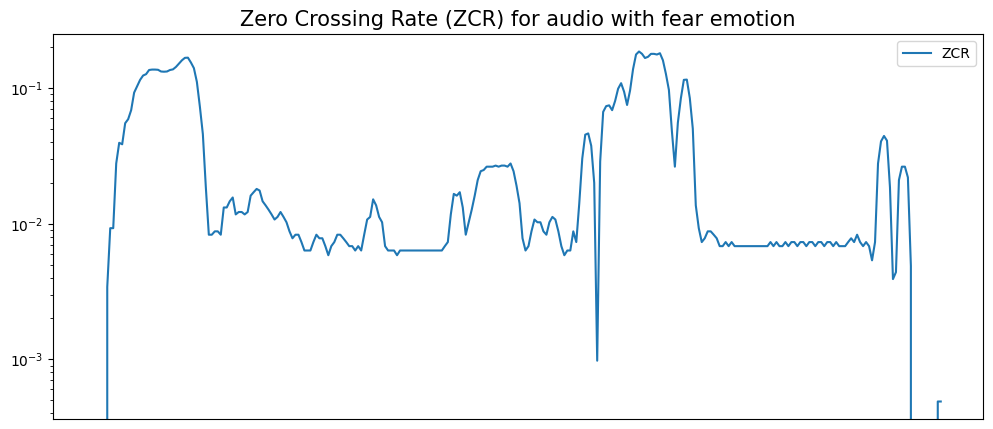

*****************************************************


In [54]:
for i in sr_l.values():
    print(i)
    path = i
    display(Audio(path))
    emotion = df.loc[df.Filename == path, 'Label'].values[0]
    data, sampling_rate = librosa.load(path, sr=None)
    create_waveplot(data, sampling_rate, emotion)
    create_spectrogram(data, sampling_rate, emotion)
    create_mfcc(data, sampling_rate, emotion)
    create_mel_spectrogram(data, sampling_rate, emotion)
    create_zcr(data, sampling_rate, emotion)
    print('*****************************************************')

In [60]:
# data augmentation with noise, and stretch
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate)

# taking any example and checking for techniques.
data, sample_rate = librosa.load(sr_l[list(sr_l.keys())[0]])

In [61]:
data

array([7.6051528e-04, 5.7663239e-04, 7.5649540e-04, ..., 1.5284557e-05,
       2.8497569e-05, 0.0000000e+00], dtype=float32)

In [75]:
import librosa
import numpy as np

def extract_features(filepath):
    data, sample_rate = librosa.load(filepath, sr = None)
    # ZCR (Zero Crossing Rate)
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data, hop_length=128).T, axis=0)

    # Chroma_stft (Chroma Short-Time Fourier Transform)
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate, n_fft=256, hop_length=128).T, axis=0)

    # MFCC (Mel Frequency Cepstral Coefficients)
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate, n_fft=256, hop_length=128).T, axis=0)

    # RMS (Root Mean Square Value)
    rms = np.mean(librosa.feature.rms(y=data, hop_length=128).T, axis=0)

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate, n_fft=256, hop_length=128).T, axis=0)

    # Spectral Contrast
    spectral_contrast = np.mean(librosa.feature.spectral_contrast(y=data, sr=sample_rate, n_fft=256, hop_length=128).T, axis=0)

    # Tonnetz (Tonal Centroid Features)
    tonnetz = np.mean(librosa.feature.tonnetz(y=data, sr=sample_rate, hop_length=128).T, axis=0)


    # Stack all extracted features horizontally
    result = np.hstack((zcr, chroma_stft, mfcc, rms, mel, spectral_contrast, tonnetz))

    return result

In [86]:
feature_df = df['Filename'].apply(lambda filepath: pd.Series(extract_features(filepath)))
feature_df['Label'] = df['Label']

In [87]:
feature_df.to_csv('audio_features.csv', index=False, header=True)

,0,1,2,3,4,5,6,7,8,9,...,165,166,167,168,169,170,171,172,173,174
0,0.102608,0.660856,0.700181,0.688274,0.678534,0.65101,0.574771,0.581165,0.638042,0.667965,...,10.399078,15.547639,16.280880,12.099816,0.009888,0.013155,-0.037082,-0.056401,0.009007,0.007479
1,0.093071,0.717658,0.739135,0.660817,0.664634,0.68995,0.616818,0.588072,0.604846,0.669522,...,9.743955,14.502651,15.335353,12.609198,-0.014074,-0.022346,-0.032157,-0.042390,0.014490,0.000316
